### 企业造血能力分析 - 收入含金量

In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[5])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

In [4]:
t1 = analysis.init_table('t1')
t1['现金占营业收入的比率'] = t1['销售商品、提供劳务收到的现金(元)'] / t1['其中：营业收入(元)']

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
销售商品、提供劳务收到的现金(元),"609,941,300","797,095,500","1,246,263,600","1,603,687,000","2,000,028,900","2,146,885,100"
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
现金占营业收入的比率,117.78%,119.74%,121.43%,114.48%,118.73%,121.24%


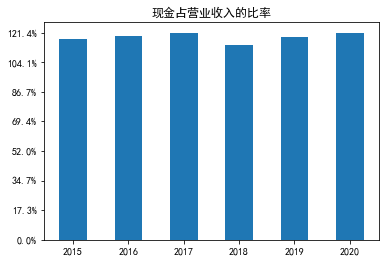

In [5]:
analysis.show_plot('t1')

In [6]:
t2 = analysis.init_table('t2')
t2['净利润现金比率'] = t2['经营活动产生的现金流量净额(元)'] / t2['五、净利润(元)']

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
五、净利润(元),"155,641,200","202,656,100","305,192,100","377,525,100","460,012,900","543,562,800"
净利润现金比率,99.89%,131.51%,147.01%,117.05%,118.12%,116.61%


In [7]:
print(f"连续 5 年的平均净利润现金含量：{t2['净利润现金比率'].mean():.2%}")

连续 5 年的平均净利润现金含量：121.70%


### 企业增长潜能：投资活动现金流分析

In [8]:
t3 = analysis.init_table('t3')
t3['投资占经营净现金流的比例'] = \
t3['购建固定资产、无形资产和其他长期资产支付的现金(元)'] / t3['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
购建固定资产、无形资产和其他长期资产支付的现金(元),"39,159,400","46,062,000","102,501,400","291,719,600","279,600,900","70,295,000"
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
投资占经营净现金流的比例,25.19%,17.28%,22.85%,66.02%,51.46%,11.09%
销售商品、提供劳务收到的现金(元),"609,941,300","797,095,500","1,246,263,600","1,603,687,000","2,000,028,900","2,146,885,100"


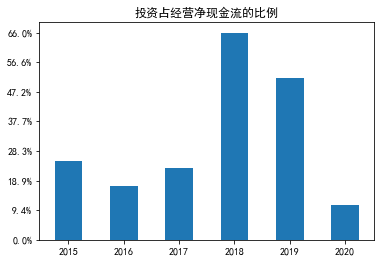

In [9]:
analysis.show_plot('t3')

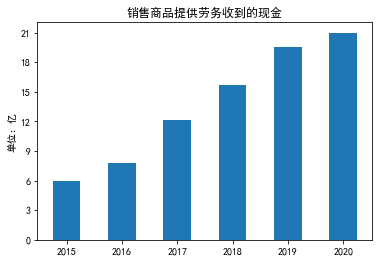

In [10]:
analysis.show_plot('t3', image_index=1)

### 分红情况：筹资活动产生的现金流

In [11]:
t4 = analysis.init_table('t4')
t4['分红金额'] = [100000000, 200000000, 300000000, 300000000, 350000000, 388000000]
t4['分红占经营现金净额的比例'] = t4['分红金额'] / t4['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
分红金额,"100,000,000","200,000,000","300,000,000","300,000,000","350,000,000","388,000,000"
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
分红占经营现金净额的比例,64.32%,75.04%,66.87%,67.89%,64.41%,61.21%


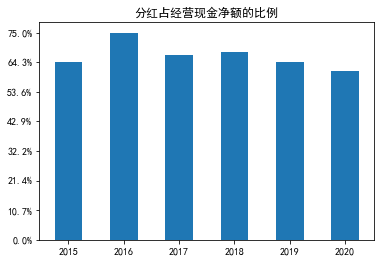

In [12]:
analysis.show_plot('t4')

### 公司类型：经营、投资、筹资活动净额的正负

In [13]:
t5 = analysis.init_table('t5')
t5_tmp = t5.copy()

t5_tmp.loc[t5['经营活动产生的现金流量净额(元)']>0, '经营活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['经营活动产生的现金流量净额(元)']<0, '经营活动产生的现金流量净额(元)'] = "负"

t5_tmp.loc[t5['投资活动产生的现金流量净额(元)']>0, '投资活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['投资活动产生的现金流量净额(元)']<0, '投资活动产生的现金流量净额(元)'] = "负"

t5_tmp.loc[t5['筹资活动产生的现金流量净额(元)']>0, '筹资活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['筹资活动产生的现金流量净额(元)']<0, '筹资活动产生的现金流量净额(元)'] = "负"

t5_tmp['三大活动现金流量净额类型'] = t5_tmp['经营活动产生的现金流量净额(元)'] + \
t5_tmp['投资活动产生的现金流量净额(元)'] + t5_tmp['筹资活动产生的现金流量净额(元)']
t5['三大活动现金流量净额类型'] = t5_tmp['三大活动现金流量净额类型']

analysis.format_show_table('t5', ignore=['三大活动现金流量净额类型'])

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
投资活动产生的现金流量净额(元),"-46,594,012","-207,333,726","240,241,214","-171,272,049","-274,100,160","-570,044,987"
筹资活动产生的现金流量净额(元),"-111,000,000","-53,649,946","-196,749,992","-299,122,986","-303,667,671","-350,159,993"
三大活动现金流量净额类型,正负负,正负负,正正负,正负负,正负负,正负负


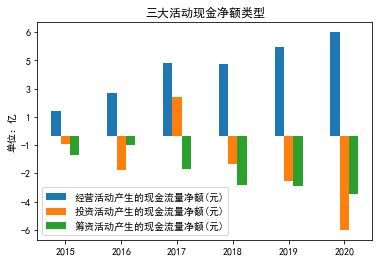

In [14]:
analysis.show_plot('t5')

### 现金增长情况：现金及现金等价物净增加额

In [15]:
t6 = analysis.init_table('t6')
# 当年的分红其实是上一年年报中计划的分红，而实际分红可能会和年报中披露的不一致，需要查同花顺个股获取当年的分红
t6['分红金额'] = [100000000, 100000000, 200000000, 300000000, 300000000, 350000000]
t6['分红+现金净增加额'] = t6.T[:2].sum()

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
五、现金及现金等价物净增加额(元),"-2,115,300","5,524,700","492,133,000","-28,509,300","-34,380,600","-286,362,300"
分红金额,"100,000,000","100,000,000","200,000,000","300,000,000","300,000,000","350,000,000"
分红+现金净增加额,"97,884,700","105,524,700","692,133,000","271,490,700","265,619,400","63,637,700"


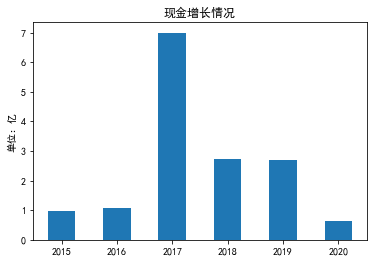

In [16]:
analysis.show_plot('t6')

### 可用现金情况：期末现金及现金等价物余额

In [17]:
t7 = analysis.init_table('t7')
t7['有息负债总额'] = t7.T[1:6].sum()
t7['期末现金余额-有息负债'] = t7['六、期末现金及现金等价物余额(元)'] - t7['有息负债总额']

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
六、期末现金及现金等价物余额(元),"358,809,300","364,334,000","856,467,000","827,957,700","793,577,100","507,214,800"
短期借款(元),0,0,0,0,0,0
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0
有息负债总额,0,0,0,0,0,0
期末现金余额-有息负债,"358,809,300","364,334,000","856,467,000","827,957,700","793,577,100","507,214,800"


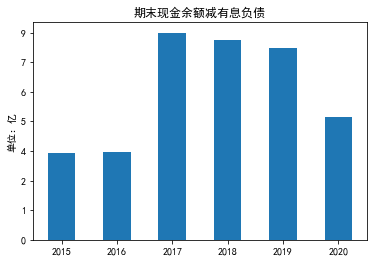

In [18]:
analysis.show_plot('t7')

### 考虑用理财产品还债：准货币资金减有息负债

In [19]:
t8 = analysis.init_table('t8')
t8['准货币资金'] = t8.T[:4].sum()
t8['有息负债总额'] = t8.T[5:10].sum()
t8['总货币资金与有息负债之差'] = t8['准货币资金'] - t8['有息负债总额']

analysis.format_show_table('t8')

,2015,2016,2017,2018,2019,2020
货币资金(元),"371,817,300","370,078,000","865,129,000","839,378,600","799,127,100","509,970,800"
交易性金融资产(元),0,0,0,0,0,"500,000,000"
其他流动资产里的理财产品,"370,000,000","550,000,000",0,0,0,0
其他流动资产里的结构性存款,0,0,0,0,0,0
准货币资金,"741,817,300","920,078,000","865,129,000","839,378,600","799,127,100","1,009,970,800"
短期借款(元),0,0,0,0,0,0
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0


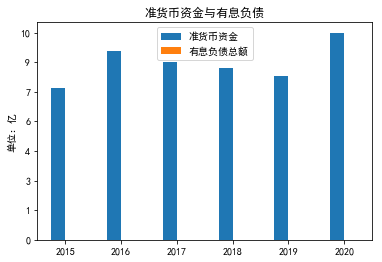

In [20]:
analysis.show_plot('t8')

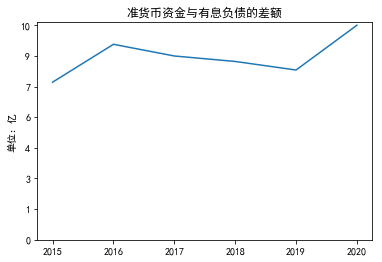

In [21]:
analysis.show_plot('t8', image_index=1)

### 输出分析报告

In [22]:
ReportDocument(analysis).save()